# Prediction of the heat capacity of inorganic materials using Machine Learning Approach

# Short Introduction to the problem statement

The heat capacity measures the amount of heat necessary to raise the temperature of an object or system by one degree celcius.

Predicted the heat capacity of inorganic materials given the chemical composition and condition (the measurement temperature) using both classical Machine Learning models (Composition Based Featured Vector) as well as Neural Networks. It served as a promising avenue for reducing the time and cost of materials development by multiple orders of magnitude.

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

try:
    import curses
    curses.setupterm()
    assert curses.tigetnum("colors") > 2
    OK = "\x1b[1;%dm[ OK ]\x1b[0m" % (30 + curses.COLOR_GREEN)
    FAIL = "\x1b[1;%dm[FAIL]\x1b[0m" % (30 + curses.COLOR_RED)
except:
    OK = '[ OK ]'
    FAIL = '[FAIL]'

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.4 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) < min_ver:
            print(FAIL, "%s version %s or higher required, but %s installed."
                  % (lib, min_ver, ver))
        else:
            print(OK, '%s version %s' % (pkg, ver))
    except ImportError as imp_err_msg:
        print(FAIL, 'Error in importing %s: %s' % (pkg, imp_err_msg))
    except AttributeError as att_err_msg:
        print(FAIL, 'Error in reading attribute of %s: %s' % (pkg, att_err_msg))
    return mod

# first check the python version
print('Using python in', sys.prefix)
print(sys.version)
pyversion = Version(sys.version)
if pyversion >= "3":
    if pyversion < "3.7":
        print(FAIL, "Python version > 3.7 is required,"
                    " but %s is installed.\n" % sys.version)
elif pyversion < "3":
    print(FAIL, "Python version > 3.7 is required,"
                " but %s is installed.\n" % sys.version)
else:
    print(FAIL, "Unknown Python version: %s\n" % sys.version)

requirements = {'numpy': '1.18.0',
                'pandas': '1.0.0',
                'pandas_profiling': '2.4.0',
                'matplotlib': '3.2.0',
                'seaborn': '0.10.0',
                'sklearn': '0.22.0',
                'scipy': '1.4.0',
                'tqdm': '4.43.0',
                'jupyter_client': '6.0.0',
                'ipywidgets': '7.5.0',
                'torch': '1.3.0',}

# now check the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

Using python in C:\Users\HP\anaconda3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


<ipython-input-1-91f2b3e62f80>:43: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  pyversion = Version(sys.version)
<ipython-input-1-91f2b3e62f80>:29: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(ver) < min_ver:


[ OK ] numpy version 1.22.3


<ipython-input-1-91f2b3e62f80>:29: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(ver) < min_ver:


[ OK ] pandas version 1.1.3


<ipython-input-1-91f2b3e62f80>:29: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(ver) < min_ver:
<ipython-input-1-91f2b3e62f80>:29: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(ver) < min_ver:


[ OK ] pandas_profiling version 3.1.0
[ OK ] matplotlib version 3.3.2
[ OK ] seaborn version 0.11.0
[ OK ] sklearn version 0.23.2
[ OK ] scipy version 1.5.2
[ OK ] tqdm version 4.50.2
[ OK ] jupyter_client version 6.1.7
[ OK ] ipywidgets version 7.5.1
[ OK ] torch version 1.11.0+cpu


<ipython-input-1-91f2b3e62f80>:29: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(ver) < min_ver:


In [2]:
import os     # OS stands for Operating System and provides ways for python to interact with files or directories
import numpy as np     # Numpy is a package for scientific computing. We'll use it for some of it's math functions
import pandas as pd     # Pandas is a data analysis library which we'll primarily use to handle our dataset
import matplotlib.pyplot as plt  # Matplotlib is the plotting package that we'll use throughout the lab
%matplotlib inline
%config InlineBackend.figure_format='retina'

# LOAD DATA SET

In [3]:
PATH = os.getcwd() #pwd=present working diretory. Permitting python to interact with the files and get the current working directories (getcwd)
data_path = os.path.join(PATH, 'cp_data_demo.csv') #defining the file path

df = pd.read_csv(data_path)
#df
#print(df)
 

# EXAMINE THE DATA

In [4]:
from pandas_profiling import ProfileReport   #pandas profile provides report on the input DataFram

In [5]:
df.head(20)

,FORMULA,CONDITION: Temperature (K),PROPERTY: Heat Capacity (J/mol K)
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625
5,B2O3,900.0,116.190
6,B2O3,800.0,111.169
7,B2O3,723.0,106.692
8,B2O3,700.0,105.228
9,B2O3,600.0,98.115


In [6]:
df.describe()

,CONDITION: Temperature (K),PROPERTY: Heat Capacity (J/mol K)
count,4579.000000,4576.000000
mean,1170.920341,107.483627
std,741.254366,67.019055
min,-2000.000000,-102.215000
25%,600.000000,61.312500
50%,1000.000000,89.497000
75%,1600.000000,135.645000
max,4700.000000,494.967000


In [7]:
profile = ProfileReport(df.copy, title='Pandas Profiling Report of Cp dataset', html={'style':{'full_width':True}})
profile
#profile.to_file("Analysis.json")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORMULA                            4579 non-null   object 
 1   CONDITION: Temperature (K)         4579 non-null   float64
 2   PROPERTY: Heat Capacity (J/mol K)  4576 non-null   float64
dtypes: float64(2), object(1)
memory usage: 107.5+ KB


looking at the row, labelled as count; it implies that we have 4579, 4576 values in the Tempt and Heat Capacity respectively. Meanwhile we have 4583 data samples, each with 3 variables by using print(f'Original DataFrame shape: {df.shape}') to print the shape above. It means some data are missing. so, 4583-4579=5 data is missing for tempt and 4583-4576=7 data is missing for heat capacity

also, negative temperature, heat capacity is an unrealistic value and should all be handled

In [9]:
df["FORMULA"].value_counts() #it provides the number of times each formulae appeared. 

W1       49
N1Ti1    44
N1Zr1    39
B1Ti1    38
O2Zr1    36
         ..
I4Mo1     4
I4Si1     4
K1        4
I4Ti1     3
N2O4      3
Name: FORMULA, Length: 244, dtype: int64

# Rename the column names for brevity

In [10]:
df.columns

Index(['FORMULA', 'CONDITION: Temperature (K)',
       'PROPERTY: Heat Capacity (J/mol K)'],
      dtype='object')

In [11]:
rename_dict = {'FORMULA': 'formula', 'CONDITION: Temperature (K)' : 'T', 'PROPERTY: Heat Capacity (J/mol K)': 'Cp' }
df = df.rename(columns=rename_dict)
df.columns

Index(['formula', 'T', 'Cp'], dtype='object')

In [12]:
df.head(5)

,formula,T,Cp
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625


# Check for and remove NaN values

In [13]:
df2=df.copy() #making a copy of the original dataset  for us to work on(remove NaN and other things)
bool_nans_formula=df2['formula'].isnull() #handling the part of the column that is null (empty) in the new dataframe that we now have(i.e the copy)
bool_nans_T=df2['T'].isnull()
bool_nans_Cp=df2['Cp'].isnull()

# Drop the rows of the DataFrame which contain NaNs
df2 = df2.drop(df2.loc[bool_nans_formula].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_T].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_Cp].index, axis=0)

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print('DataFrame shape after dropping NaNs: ',df2.shape) 

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs:  (4570, 3)


In [14]:
df3=df.copy()
df3=df3.dropna(axis=0, how='any')

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print(f'DataFrame shape after dropping NaNs: {df3.shape}')
print('DataFrame shape is {} after dropping NaNs '.format(df3.shape))

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs: (4570, 3)
DataFrame shape is (4570, 3) after dropping NaNs 


In [15]:
df = df3.copy() #replacing the original dataset with the cleaned dataset


# Check for and remove unrealistic values

In [16]:
bool_invalid_T=df['T']<0
bool_invalid_Cp=df['Cp']<0

df=df.drop(df.loc[bool_invalid_T].index, axis=0)
df=df.drop(df.loc[bool_invalid_Cp].index, axis=0)

print('Cleaned DataFrame shape: ',df.shape)

Cleaned DataFrame shape:  (4564, 3)


# Save cleaned data to csv

we can save the cleaned. Pandas allows us to save our data as a comma separated value .csv or other file (SQL, etc).

In [17]:
out_path=os.path.join(PATH, 'cp_data_cleaned.csv')
df.to_csv(out_path, index=False)

# Splitting data into the train/validation/test dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
rnd_seed = 42
np.random.seed(seed=rnd_seed)

# Separate the DataFrame into your input variables ( 𝑋 ) and target variables ( 𝑦 )

In [20]:
X= df[['formula','T']]
y= df['Cp']

In [21]:
print('shape of X is:', X.shape)
print(f'shape of y: {y.shape}')

shape of X is: (4564, 2)
shape of y: (4564,)


# Splitting data (and a word of caution)

Normally, we could simply split the data with a simple sklearn function

Typically, you can use train_test_split to first split your data into "train" and "test" datasets, and then use the function again to split your "train" data into "train" and "validation" dataset splits.

As a rule of thumb, you can roughly aim for the following dataset proportions when splitting your data:

|Vlaue|train split|validation test|test split|
|---|---|---|---|
|proportion of the original set|50% to 70%|20% to 30%|10% to 20%|

If you have copious amounts of data, it may suffice to train your models on just 50% of the data; that way, you have a larger amount of data samples to validate and to test with. If you however have a smaller dataset and thus very few training samples for your models, you may wish to increase your proportion of training data during dataset splitting

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=rnd_seed)
print(X_train.shape)
print(X_test.shape)
print(X_train)


(3651, 2)
(913, 2)
       formula       T
3175     O3Ti2  1500.0
1021   Co1O4S1  1500.0
4455       Sr1   400.0
230     Br3Zr1   500.0
858      C1Be2  1900.0
...        ...     ...
4444       Sr1  1300.0
467   Al1Cl6K3  1800.0
3098     Nb1O1  1100.0
3784     Mo2S3  2100.0
861      C1Be2  1600.0

[3651 rows x 2 columns]


<AxesSubplot:>

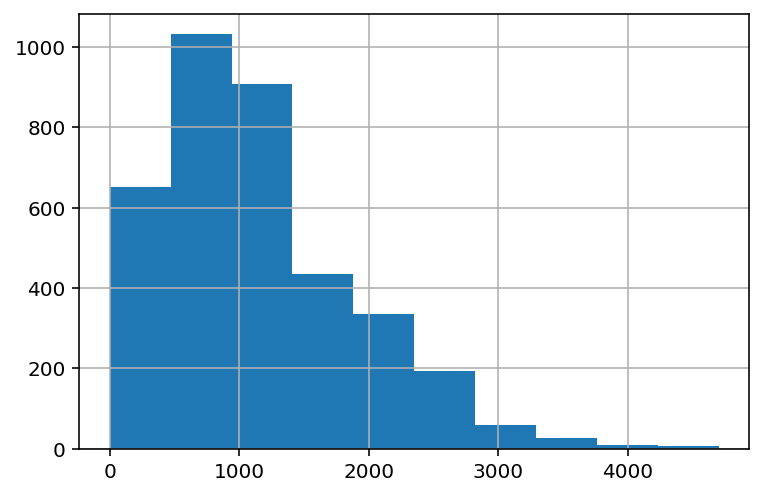

In [23]:
X_train["T"].hist()

<AxesSubplot:>

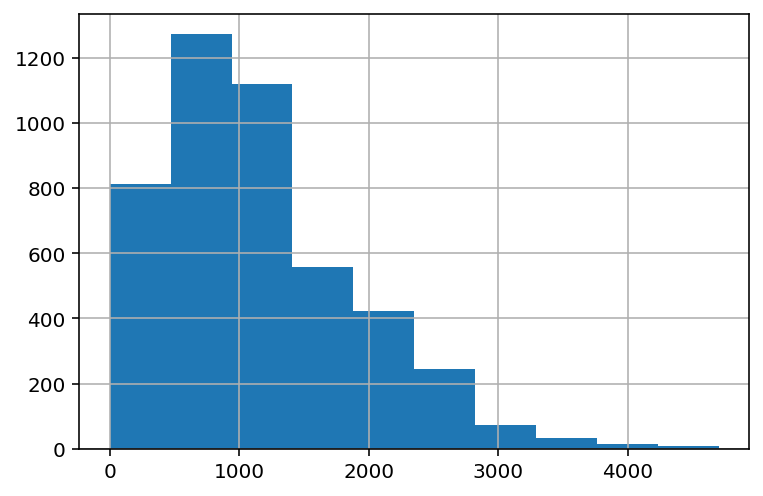

In [24]:
X["T"].hist()

We have to make sure that our dataset splits contain mutually exclusive formulae (e.g., all the data samples associated with "Al2O3" is either in the train, validation, or test dataset, but not in multiple)! For example, N2O4 appeared 3 timesIf and if we use the random data splitting, it might split one of the N2O4 in the training data and put another in the testset. By doing this, it has disobeyed the mutually exclusive law of spliting dataset. 

To handle this, I will split the dataset uniquely(i.e whenever I pick a compound, i will not pick the same compound again, for instance, N2O4 appeared 3 times

In [25]:
X_train

,formula,T
3175,O3Ti2,1500.0
1021,Co1O4S1,1500.0
4455,Sr1,400.0
230,Br3Zr1,500.0
858,C1Be2,1900.0
...,...,...
4444,Sr1,1300.0
467,Al1Cl6K3,1800.0
3098,Nb1O1,1100.0
3784,Mo2S3,2100.0


In [26]:
num_rows = len(X_train)
print(f'There are in total {num_rows} rows in the X_train DataFrame.')

num_unique_formulae = len(X_train['formula'].unique())
print(f'But there are only {num_unique_formulae} unique!\n')
      
print('Unique formulae and their number of occurances in the X_train DataFrame:')
print(X_train['formula'].value_counts(), '\n')
print('Unique formulae and their number of occurances in the X_test DataFrame:')
print(X_test['formula'].value_counts())

There are in total 3651 rows in the X_train DataFrame.
But there are only 244 unique!

Unique formulae and their number of occurances in the X_train DataFrame:
W1       40
N1Ti1    38
B1Ti1    33
N1Zr1    33
O2Zr1    30
         ..
I2        4
N2O4      3
K1        2
I4Ti1     1
Hg1O1     1
Name: formula, Length: 244, dtype: int64 

Unique formulae and their number of occurances in the X_test DataFrame:
N0.465V1    10
Ca1S1       10
Be2O4Si1    10
S1Sr1        9
W1           9
            ..
Pb1S1        1
Cs1          1
Fe1H2O2      1
I2Sr1        1
O1Pb1        1
Name: formula, Length: 229, dtype: int64


# Be aware of leaking data between datasets

We have to first group the data by chemical formula, then split the data according to the chemical formulae. That way, all data points associated with each formula are either in the training dataset or in the test dataset, but not in both at the same time.

# Splitting data, cautiously (manually)

First we get a list of all of the unique formulae in the dataset.

In [27]:
unique_formulae = X['formula'].unique()
print(f'{len(unique_formulae)} unique formulae:\n{unique_formulae}')

244 unique formulae:
['B2O3' 'Be1I2' 'Be1F3Li1' 'Al1Cl4K1' 'Al2Be1O4' 'B2H4O4' 'B2Mg1' 'Be1F2'
 'B1H4Na1' 'Br2Ca1' 'Al1N1' 'Al1Cl6Na3' 'Ba1H2O2' 'Al1Br3' 'Br3Zr1'
 'Br2Ti1' 'B1Ti1' 'Be2O4Si1' 'Br2Pb1' 'Al1' 'Br2Hg2' 'B1H3O3' 'Br3Ti1'
 'C1Cu1N1' 'B1' 'Al1F6Na3' 'Ca1H2O2' 'B2Be3O6' 'Al1Cl4Na1' 'Al1Cl6K3'
 'C0.98Nb1' 'Br2Hg1' 'Al1Cl1O1' 'Cl1H4N1O4' 'Be1F4Li2' 'C1Mg1O3' 'Br1H4N1'
 'Ca1I2' 'Al1F6Li3' 'Br4Mo1' 'Ba1' 'Br4Ti1' 'Ba1Br2' 'Be1O4S1' 'Ba1F2'
 'Ba1I2' 'Cl2Fe1' 'C1K1N1' 'Be1H2O2' 'Cs1' 'Al1H4Li1' 'C1Be2' 'Cr1'
 'Cs2O4S1' 'Cl1Cu1' 'Cu1F2' 'Al2O3' 'B1N1' 'Co1O4S1' 'Cu1O1' 'Br1Na1'
 'Cr2O3' 'Cs1F1' 'Cr2N1' 'Cl1Li1' 'Fe0.877S1' 'Cl1Na1' 'F2Hg1' 'Fe1H2O2'
 'Cs1H1O1' 'Br3Mo1' 'Br2Sr1' 'Cl2Hg2' 'Fe1O1' 'Co1' 'Cl1Cs1' 'Cu1H2O2'
 'Al1Li1O2' 'Co1F2' 'Br2Fe1' 'Fe1I2' 'Ga1' 'Cl1Li1O4' 'Cl2Cu1' 'Fe0.947O1'
 'Be1Cl2' 'Cl1K1' 'F1Na1' 'H3O4P1' 'Fe3O4' 'H1Na1O1' 'Fe2O12S3' 'H1Na1'
 'Cl1Na1O4' 'B1F4K1' 'Cu1O4S1' 'H1Li1' 'F2H1K1' 'B1H4Li1' 'Hg1O1' 'Be3N2'
 'Fe1' 'I2Mo1' 'Cu1F1' 'Cr1N1' 'Fe1H3O3' 'I1Li1

In [28]:
# Next is to set a random seed to ensure reproducibility across runs i.e whenever it is run (probably for another model or any other time it is run), the same value of test and train set remains the same.
np.random.seed(seed=rnd_seed)

# Store a list of all unique formulae which can now be splitted manually
all_formulae = unique_formulae.copy()

# Define the proportional size of the dataset split
val_size = 0.20
test_size = 0.10
train_size = 1 - val_size - test_size

# Calculate the number of samples in each dataset split
num_val_samples = int(round(val_size * len(unique_formulae)))
num_test_samples = int(round(test_size * len(unique_formulae)))
num_train_samples = int(round((1 - val_size - test_size) * len(unique_formulae)))

# Randomly choose the formulate for the validation dataset, and remove those from the unique formulae list
val_formulae = np.random.choice(all_formulae, size=num_val_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in val_formulae]

# Randomly choose the formulate for the test dataset, and remove those from the unique formulae list
test_formulae = np.random.choice(all_formulae, size=num_test_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in test_formulae]

# The remaining formulae will be used for the training dataset
train_formulae = all_formulae.copy()

print('Number of training formulae:', len(train_formulae))
print('Number of validation formulae:', len(val_formulae))
print('Number of testing formulae:', len(test_formulae))

Number of training formulae: 171
Number of validation formulae: 49
Number of testing formulae: 24


In [29]:
# Split the original dataset into the train/validation/test datasets using the formulae lists above
df_train = df[df['formula'].isin(train_formulae)]
df_val = df[df['formula'].isin(val_formulae)]
df_test = df[df['formula'].isin(test_formulae)]

print(f'train dataset shape: {df_train.shape}')
print(f'validation dataset shape: {df_val.shape}')
print(f'test dataset shape: {df_test.shape}\n')

print(df_train.head(), '\n')
print(df_val.head(), '\n')
print(df_test.head(), '\n')

train dataset shape: (3214, 3)
validation dataset shape: (980, 3)
test dataset shape: (370, 3)

  formula       T       Cp
0    B2O3  1400.0  134.306
1    B2O3  1300.0  131.294
2    B2O3  1200.0  128.072
3    B2O3  1100.0  124.516
4    B2O3  1000.0  120.625 

   formula       T      Cp
83   B2Mg1  1900.0  92.242
84   B2Mg1  1800.0  90.249
85   B2Mg1  1700.0  88.162
86   B2Mg1  1600.0  85.981
87   B2Mg1  1500.0  83.643 

     formula       T       Cp
193  Ba1H2O2  900.00  134.892
194  Ba1H2O2  800.00  130.834
195  Ba1H2O2  700.00  126.775
196  Ba1H2O2  681.15  126.022
197  Ba1H2O2  600.00  122.717 



In [30]:
train_formulae = set(df_train['formula'].unique())
val_formulae = set(df_val['formula'].unique())
test_formulae = set(df_test['formula'].unique())

common_formulae1 = train_formulae.intersection(test_formulae)
common_formulae2 = train_formulae.intersection(val_formulae)
common_formulae3 = test_formulae.intersection(val_formulae)

print(f'# of common formulae in intersection 1: {len(common_formulae1)}; common formulae: {common_formulae1}')
print(f'# of common formulae in intersection 2: {len(common_formulae2)}; common formulae: {common_formulae2}')
print(f'# of common formulae in intersection 3: {len(common_formulae3)}; common formulae: {common_formulae3}')

# of common formulae in intersection 1: 0; common formulae: set()
# of common formulae in intersection 2: 0; common formulae: set()
# of common formulae in intersection 3: 0; common formulae: set()


# Save split datasets to csv

Finally, after splitting the dataset into train/validation/test dataset splits, you can save them to disk for you to use later.

By saving these dataset splits into files, you can then later reproducibly use these same exact splits during your subsequent model training and comparison steps. Use the same datasets for all your models---that way, you can ensure a fair comparison.

Also, when you publish your results, you can include these dataset splits, so that others can use the exact datasets in their own studies.

In [31]:
# saving these splits into csv files
PATH = os.getcwd()

train_path = os.path.join(PATH, 'cp_train.csv')
val_path = os.path.join(PATH, 'cp_val.csv')
test_path = os.path.join(PATH, 'cp_test.csv')

df_train.to_csv(train_path, index=False)
df_val.to_csv(val_path, index=False)
df_test.to_csv(test_path, index=False)

# Data Featurization 

Here, we will show some simple examples of featurizing materials composition data using so-called "composition-based feature vectors", or CBFVs. This methods represents a single chemical formula as one vector based on its constituent atoms' chemical properties (refer to the paper for more information and references).

Note that the steps shown in this notebook are intended to demonstrate the best practices associated with featurizing materials data, using one way of featurizing materials composition data as an example. Depending on your input data and your particular modeling needs, the data featurization method and procedure you use may be different than the example shown here.

In [32]:
from collections import OrderedDict    # Collections is a package for handling data

# Loading data

We will start with the dataset splits that we saved from the last notebook.

In [33]:
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (3214, 3)
df_val DataFrame shape: (980, 3)
df_test DataFrame shape: (370, 3)


# Sub-sampling your data (optional)

If your dataset is too large, you can subsample it to be a smaller size. This is useful for prototyping and for making quick sanity tests of new models / parameters.

Just be aware that you do not introduce any bias into your data through the sampling.

In [34]:
# Sub-sample the data. Set the random_state to make the sampling reproducible every time.
df_train_sampled = df_train.sample(n=2000, random_state=rnd_seed)
df_val_sampled = df_val.sample(n=200, random_state=rnd_seed)
df_test_sampled = df_test.sample(n=200, random_state=rnd_seed)

print(f'df_train_sampled DataFrame shape: {df_train_sampled.shape}')
print(f'df_val_sampled DataFrame shape: {df_val_sampled.shape}')
print(f'df_test_sampled DataFrame shape: {df_test_sampled.shape}')

df_train_sampled DataFrame shape: (2000, 3)
df_val_sampled DataFrame shape: (200, 3)
df_test_sampled DataFrame shape: (200, 3)


# Generate features using the CBFV package

To featurize the chemical compositions from a chemical formula (e.g. "Al2O3") into a composition-based feature vector (CBFV)

In [35]:
# Import the package and the generate_features function
from CBFV.composition import generate_features

The generate_features function from the CBFV package expects an input DataFrame containing at least the columns ['formula', 'target']. You may also have extra feature columns (e.g., temperature or pressure, other measurement conditions, etc.).

In our dataset, Cp represents the target variable, and T is the measurement condition. Since the generate_features function expects the target variable column to be named target, we have to rename the Cp column.

In [36]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

df_train_sampled = df_train_sampled.rename(columns=rename_dict)
df_val_sampled = df_val_sampled.rename(columns=rename_dict)
df_test_sampled = df_test_sampled.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')


Now we can use the `generate_features` function to generate the CBFVs from the input data.

Note that we have specified several keyword arguments in our call to `generate_features`:
* `elem_prop='oliynyk'`
* `drop_duplicates=False`
* `extend_features=True`
* `sum_feat=True`

A short explanation for the choice of keyword arguments is below:
* The `elem_prop` parameter specifies which CBFV featurization scheme to use (there are several). For this tutorial, we have chosen to use the `oliynyk` CBFV featurization scheme.
* The `drop_duplicates` parameter specifies whether to drop duplicate formulae during featurization. In our case, we want to preserve duplicate formulae in our data (`True`), since we have multiple heat capacity measurements (performed at different temperatures) for the same compound.
* The `extend_features` parameter specifies whether to include extended features (features that are not part of `['formula', 'target']`) in the featurized data. In our case, this is our measurement temperature, and we want to include this information (`True`), since this is pertinent information for the heat capacity prediction.
* The `sum_feat` parameter specifies whether to calculate the sum features when generating the CBFVs for the chemical formulae. We do in our case (`True`).

For more information about the `generate_features` function and the CBFV featurization scheme, refer to the GitHub repository and the accompanying paper to this notebook.

In [37]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:  15%|█▌        | 306/2000 [00:00<00:00, 2865.90it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 2000/2000 [00:00<00:00, 3379.98it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 200/200 [00:00<00:00, 3125.38it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 200/200 [00:00<00:00, 3571.79it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [38]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,32.0,65.116040,8.0,30.0,15.0,1.0,2.0,0.0,162.0,2.0,...,63.25,77.35,0.00125,0.710,0.3604,2.79280,0.02598,90.0,0.934,600.0
1,28.0,53.491200,9.0,36.0,43.0,0.0,6.0,0.0,544.0,2.0,...,14.05,20.25,0.00007,14.304,0.5868,0.44936,0.18150,218.0,0.000,457.7
2,46.0,98.887792,14.0,72.0,36.0,3.0,4.0,0.0,441.0,4.0,...,53.35,85.05,0.00170,0.820,0.2552,3.26980,0.02790,79.0,0.840,300.0
3,20.0,41.988171,5.0,18.0,9.0,1.0,1.0,0.0,95.0,1.0,...,53.35,85.05,0.00170,0.820,0.2552,3.26980,0.02790,79.0,0.840,2800.0
4,82.0,207.200000,6.0,14.0,5.0,1.0,0.0,0.0,81.0,1.0,...,600.65,2013.15,11.40000,0.130,4.7990,177.70000,35.30000,196.0,2.030,1400.0


In [39]:
X_train_unscaled.shape

(2000, 309)

In [40]:
X_val_unscaled.shape

(200, 309)

In [41]:
X_test_unscaled.shape

(200, 309)

Note the `sum` features in the CBFV, which we have included by using `sum_feat=True` in the call to `generate_features`.

Also note the temperature column `T` at the end of this featurized data.

What we have done above is featurize the input data. In the featurized data, each row contains a unique CBFV that describes a given chemical composition.

# Data scaling & normalization

For numerical input data, scaling and normalization of the features often improves the model performance.
Scaling can partially correct the discrepancy between the orders of magnitudes of the features (e.g., some numerical features being much larger or smaller than others).
This typically improves the model learning performance, and in turn, improves the model performance.

We will scale then normalize our input data using scikit-learn's built-in `StandardScaler` class and `normalize` function.

Note, in addition to `StandardScaler`, other scalers such as `RobustScaler` and `MinMaxScaler` are also available in scikit-learn. Consult the documentation for the details and when to use them.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

## Scaling the data

First, we instantiate the scaler object.

In a `StandardScaler` object:
* During the `fit` process, the statistics of the input data (mean and standard deviation) are computed.
* Then, during the `transform` process, the mean and standard deviation values calculated above are used to scale the data to having zero-mean and unit variance.

Therefore, for the first time usage of the scaler, we call the `.fit_transform()` method to fit the scaler to the input data, and then to transform the same data.
For subsequent uses, since we have already computed the statistics, we only call the `.transform()` method to scale data.

**Note:** you should *only* `.fit()` the scaler using the training dataset statistics, and then use these same statistics from the training dataset to `.transform()` the other datasets (validation and train).

In [43]:
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

## Normalizing the scaled data

We repeat a similar process for normalizing the data.
Here, there is no need to first fit the normalizer, since the normalizer scales the rows of the input data to unit norm independently of other rows.

The normalizer is different to a Scaler in that the normalizer acts row-wise, whereas a Scaler acts column-wise on the input data.

In [44]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Modeling using "classical" machine learning models

Here we implement some classical ML models from `sklearn`:

* Ridge regression
* Support vector machine
* Linear support vector machine
* Random forest
* Extra trees
* Adaptive boosting
* Gradient boosting
* k-nearest neighbors
* Dummy (if you can't beat this, something is wrong.)

Note: the Dummy model types from `sklearn` act as a good sanity check for your ML studies. If your models do not perform significantly better than the equivalent Dummy models, then you should know that something has gone wrong in your model implementation.

In [45]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In addition, we define some helper functions.

In [46]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

Build an empty DataFrame to store model results:

In [47]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


## Define the models

Here, we instantiate several classical machine learning models for use.
For demonstration purposes, we instantiate the models with their default model parameters.

Some of the models listed above can perform either regression or classification tasks.
Because our ML task is a regression task (prediction of the continuous-valued target, heat capacity), we choose the regression variant of these models.

Note: the `DummyRegressor()` instance acts as a good sanity check for your ML studies. If your models do not perform significantly better than the `DummyRegressor()`, then you know something has gone awry.

In [48]:
# Build a dictionary of model names
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

## Instantiate and fit the models

Now, we can fit the ML models.

We will loop through each of the models listed above. For each of the models, we will:
* instantiate the model (with default parameters)
* fit the model using the training data
* use the fitted model to generate predictions from the validation data
* evaluate the performance of the model using the predictions
* store the results in a DataFrame for analysis

Note: this may take several minutes, depending on your hardware/software environment, dataset size and featurization scheme (CBFV).

In [49]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 116.46 s


In [50]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000000,0.000000,47.451805,60.600844,-0.000090,52.577391,71.971190
1,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",2.573784,0.739347,18.191656,30.939250,0.644943,26.156172,42.883302
2,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.039996,0.778935,16.718459,28.493016,0.692202,22.574844,39.927490
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.247976,0.982221,3.877345,8.080383,0.768216,23.973951,34.648242
4,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",8.608255,0.923498,14.145190,16.761557,0.839587,21.745505,28.824307
5,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.175984,0.904140,12.359416,18.762775,0.866957,17.505206,26.250392
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",54.849745,0.998363,1.221557,2.452111,0.893264,15.132261,23.512223
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",21.837268,0.999995,0.010897,0.134942,0.896683,13.674303,23.132575
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",23.924689,0.985324,5.356380,7.341458,0.907966,15.133807,21.833037


Now, we can look at the results.

You will notice, that some of the models (such as RandomForestRegressor, ExtraTreesRegressor and GradientBoostingRegressor) have completely memorized the training data, as evidenced by the very high r2_train scores of ~1.0.

In [51]:
classic_models

OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('knr', KNeighborsRegressor())])

## Evaluating model performance on validation dataset

Now comes the time to evaluate the trained models on the validation set.

Remember, we use the same validation set to evaluate all models. This ensures a fair comparison.

In addition, we plot the predicted vs. actual plots using the predictions made by each trained model on the same validation set.

In [52]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

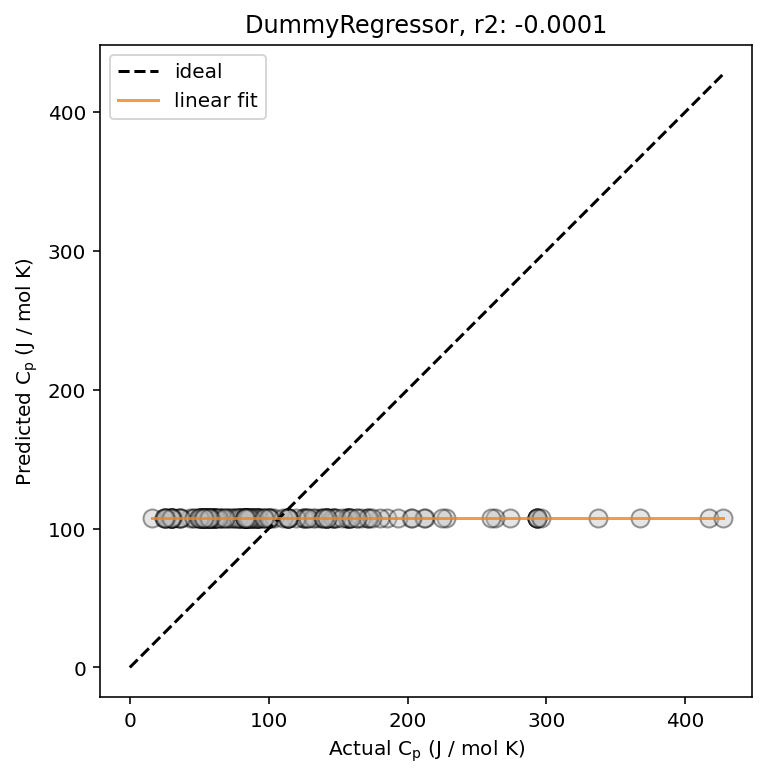

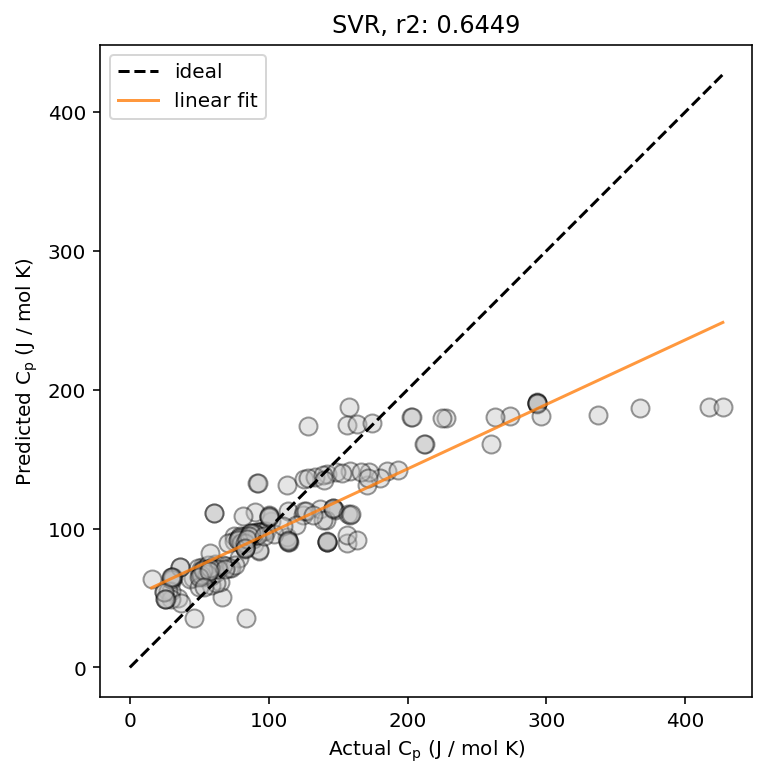

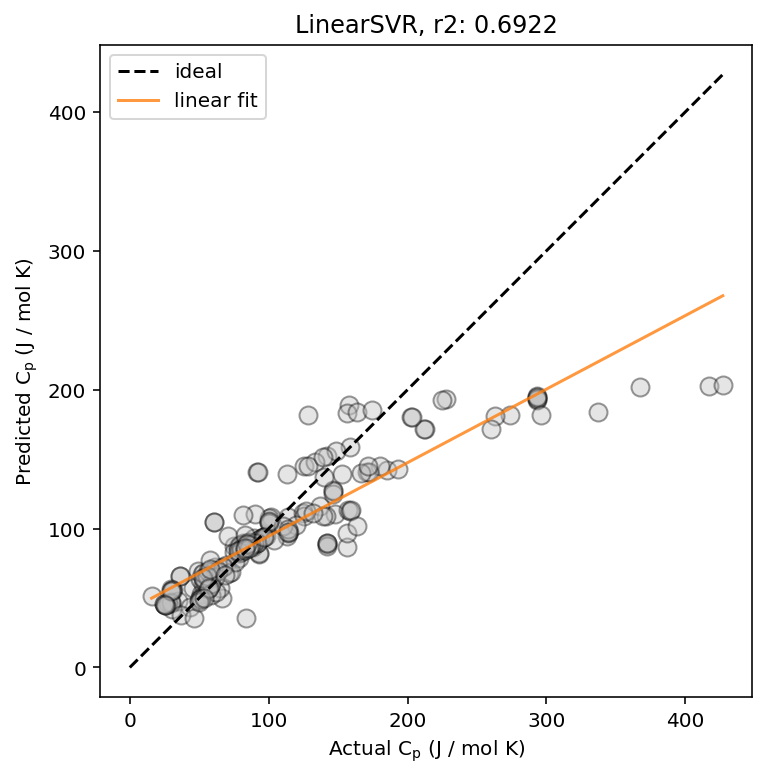

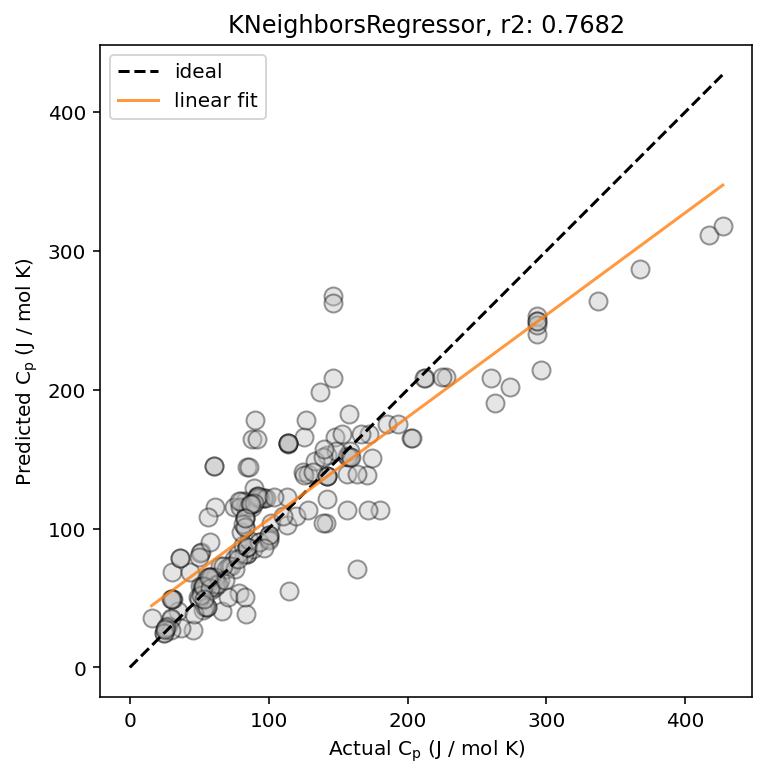

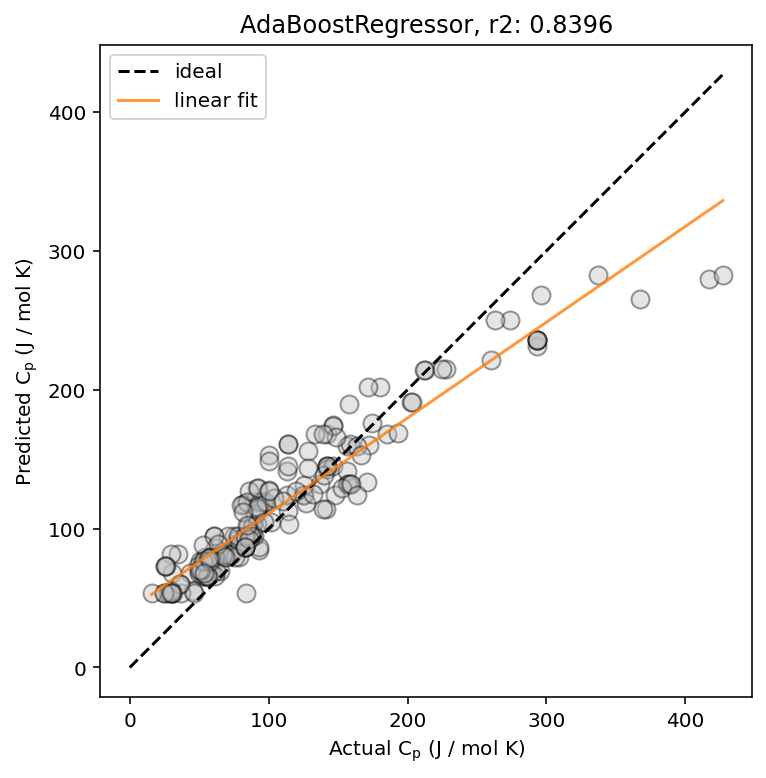

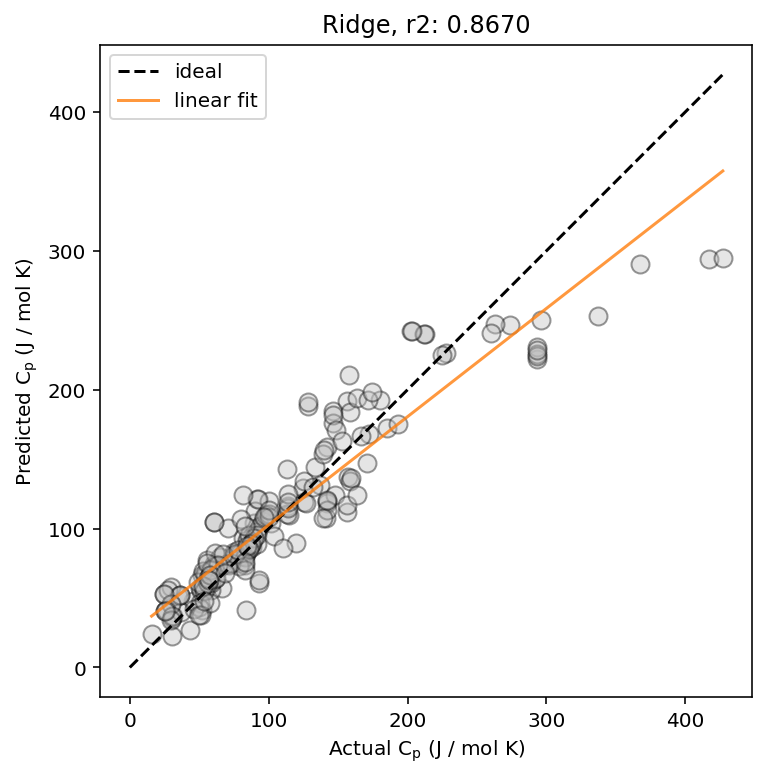

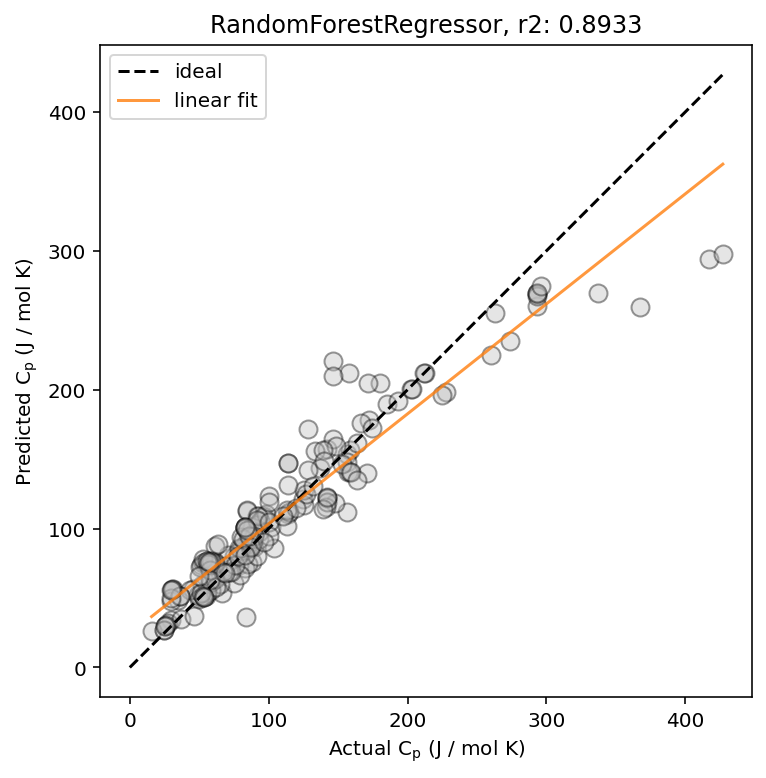

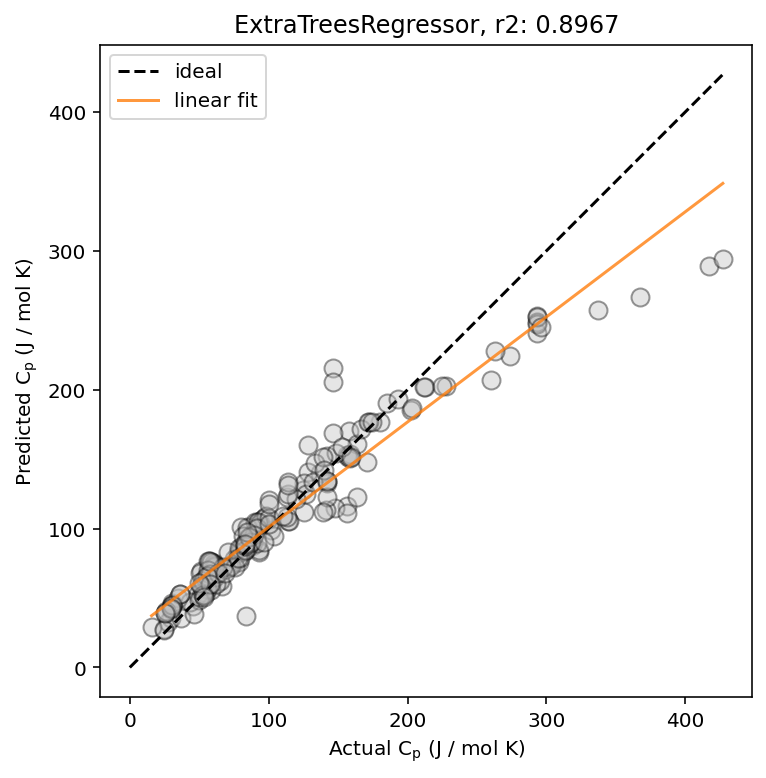

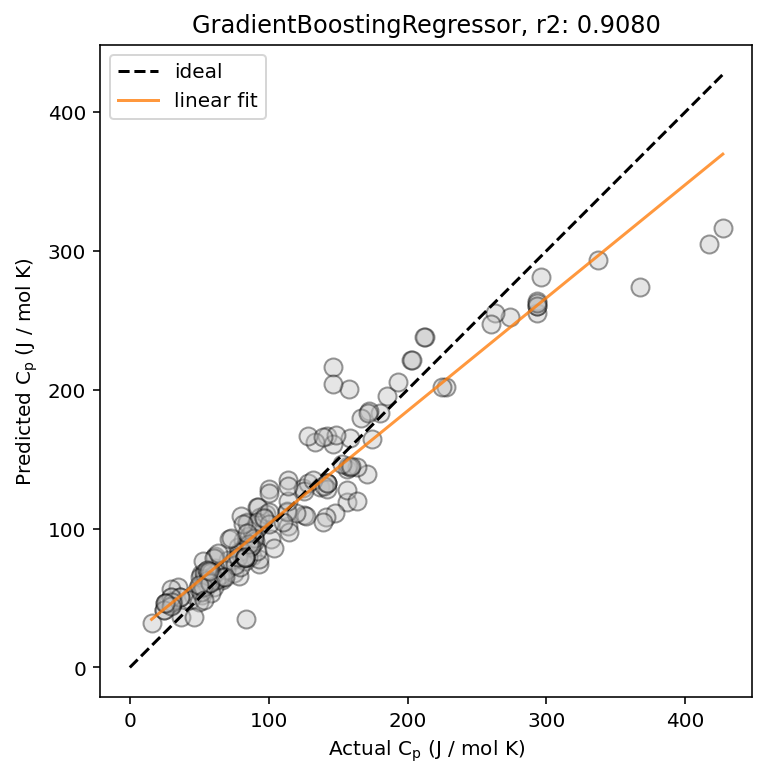

In [53]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot=plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

## Re-training the best-performing model on combined train + validation dataset

After you have finalized your model, you can re-train your model (using the same hyperparameters) again on the combined train + validation datasets, and finally, evaluate your model on the held-out test dataset.

By training on the combined train + validation dataset after you have finished tuning your model, you give it more training data, which should lead to an increase in the model performance.

In [54]:
# Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)
print(model)

GradientBoostingRegressor()


In [55]:
# Concatenate the train and validation datasets together
X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

print(X_train_new.shape)

(2200, 309)


# Finally, we can fit the model on the combined train + validation dataset.

In [56]:
ti = time()

model.fit(X_train_new, y_train_new)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

Finished fitting best model, total time: 27.09 s


# HYPERPARAMETER TUNING


# Testing the re-trained model on the test dataset

After re-fitting the best model on the train+validation dataset, you can finally test it on the test dataset.
**Remember:** you should only do this *once!*

r2: 0.8216
mae: 18.8100
rmse: 33.2091


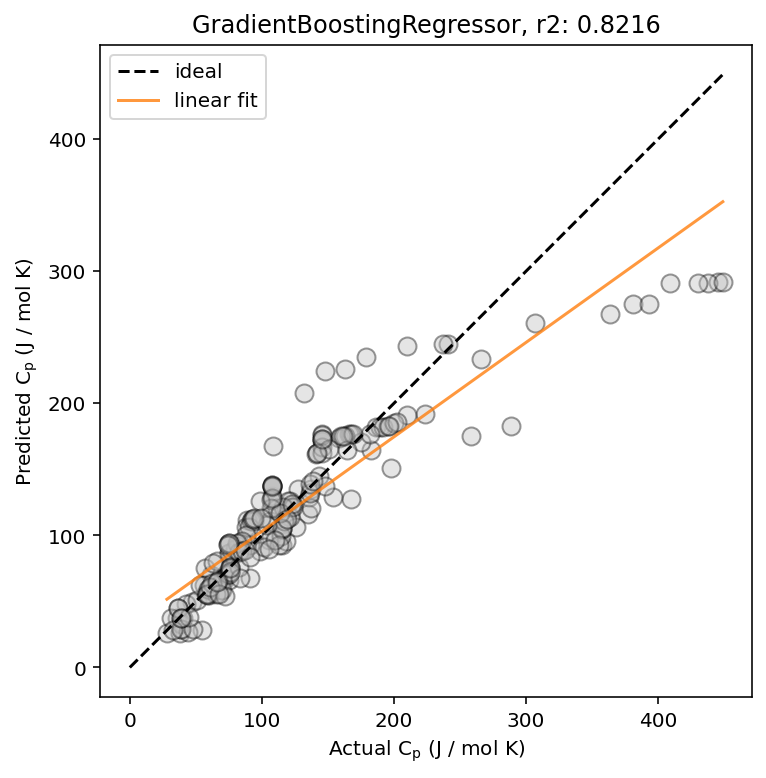

In [57]:
y_act_test = y_test
y_pred_test = model.predict(X_test)

r2, mae, rmse = evaluate_model(model, X_test, y_test)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

We see that our model achieves decent performance on the held-out test dataset.

# Significance

This means that there is less variation around the ideal (Normal Methods) of doing things. i.e since the r2 value is about 82%.
R2 is the coeeficient of determination: it is the proportion of the variation in the dependent variable (y) that is attributed to the independent variables.

# To interpret the ML model

In [58]:
# # X_train_new3 = X_train_new.copy()
# # X_train_new3=pd.DataFrame(X_train, columns = X.columns)


# # df3=df.copy()
# # df3=df3.dropna(axis=0, how='any')
# # X_test = X.test.copy2
# # X.test.copy2=pd.df(X_test, columns=X.columns)


# import lime
# from lime import lime_tabular

# intepretor = lime_tabular.LimeTabularExplainer(
# training_data=np.array(X_train),
# feature_names = df_classics.columns,
# mode = 'regression'
# )

In [59]:
# exp = interpretor.explain_instance(
#     data_row=X_test.iloc[4],
#     predict_fn=classifier.predict_proba
# )

# exp.show_in_notebook(show_table=True)

# Effect of train/validation/test dataset split

Using different train/validation/test splits can dramatically affect your model performance, even for classical ML models.

Here, we provide a little demonstration.

In [60]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:   8%|▊         | 243/3214 [00:00<00:01, 2336.80it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3214/3214 [00:01<00:00, 2902.77it/s]


	Creating Pandas Objects...


Assigning Features...:  32%|███▏      | 310/980 [00:00<00:00, 2980.99it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 980/980 [00:00<00:00, 2549.12it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 370/370 [00:00<00:00, 2434.40it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [61]:
X_train_original = X_train_unscaled.copy()
X_val = X_val_unscaled.copy()
X_test = X_test_unscaled.copy()

y_train_original = y_train.copy()

We sample the training data using 10 random seeds, by using the `DataFrame.sample()` method with seeds ranging from 0 to 9.
We then fit 10 models, each on one of the random splits, and evaluate their performance on the same validation dataset.

In [62]:
splits = range(10)
df_splits = pd.DataFrame(columns=['split',
                                  'r2_train',
                                  'mae_train',
                                  'rmse_train',
                                  'r2_val',
                                  'mae_val',
                                  'rmse_val'])

for split in splits:
    print(f'Fitting and evaluating random split {split}')
    X_train = X_train_original.sample(frac=0.7, random_state=split)
    y_train = y_train_original[X_train.index]

    scaler = StandardScaler()
    X_train = normalize(scaler.fit_transform(X_train))
    X_val = normalize(scaler.transform(X_val_unscaled))
    X_test = normalize(scaler.transform(X_test_unscaled))
    
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_val)
    result_dict = {
        'split': split,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    
    df_splits = append_result_df(df_splits, result_dict)

Fitting and evaluating random split 0
Fitting and evaluating random split 1
Fitting and evaluating random split 2
Fitting and evaluating random split 3
Fitting and evaluating random split 4
Fitting and evaluating random split 5
Fitting and evaluating random split 6
Fitting and evaluating random split 7
Fitting and evaluating random split 8
Fitting and evaluating random split 9


In [63]:
df_splits['split'] = df_splits['split'].astype(int)
df_splits

,split,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,0,0.924411,13.944471,16.677244,0.817451,24.083920,34.312196
1,1,0.926312,13.683928,16.415738,0.809339,24.840058,35.066345
2,2,0.927361,13.603718,16.536317,0.822164,23.098069,33.866389
3,3,0.931193,13.152535,16.002014,0.841611,21.366565,31.961048
4,4,0.925246,13.892643,16.602724,0.820281,24.368322,34.045256
5,5,0.925551,14.017381,16.609464,0.817996,24.055071,34.260988
6,6,0.924670,14.272290,16.839028,0.804468,25.134305,35.511425
7,7,0.922404,14.184148,16.781029,0.824973,23.875616,33.597884
8,8,0.925025,13.888555,16.531313,0.822661,23.749629,33.819008
9,9,0.919708,14.185107,16.936880,0.821596,24.339583,33.920465


We then plot the train and validation $r^2$ scores for each of the 10 models.

Note the high variability in the r2_val score. In contrast, the variability in the r2_train score is comparatively lower.

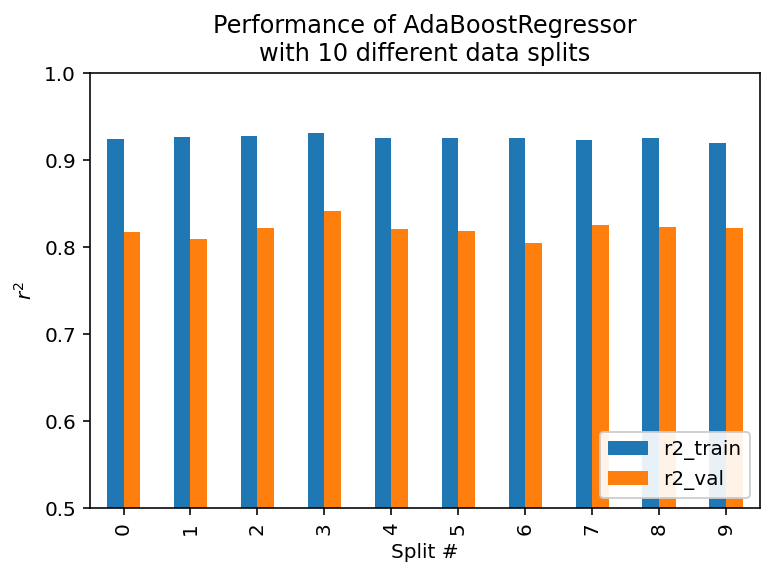

In [64]:
df_splits.plot('split', ['r2_train', 'r2_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylim((0.5, 1.0))
plt.ylabel('$r^2$')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

This effect is even more pronounced when we plot the mean abolute error (MAE).

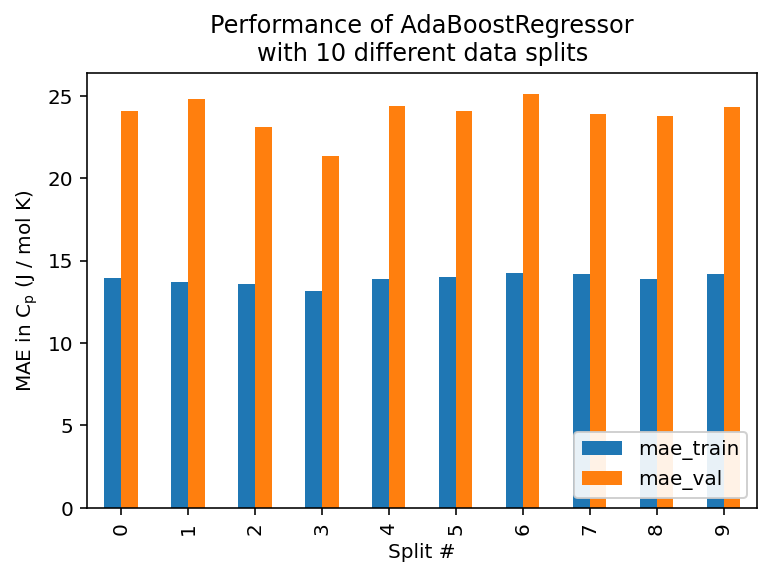

In [65]:
df_splits.plot('split', ['mae_train', 'mae_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylabel('MAE in $\mathrm{C}_\mathrm{p}$ (J / mol K)')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

Therefore, typically the average value of all the scores are reported, as this gives a much more accurate estimate of how well the model actually performs.

In [66]:
avg_r2_val = df_splits['r2_val'].mean()
avg_mae_val = df_splits['mae_val'].mean()

print(f'Average validation r2: {avg_r2_val:0.4f}')
print(f'Average validation MAE: {avg_mae_val:0.4f}')

Average validation r2: 0.8203
Average validation MAE: 23.8911



# Modeling using neural network / deep learning-based models

In this notebook, we will cover how to implement a simple neural network for the modeling of heat capacity.

We will load, prepare featurize, and scale/normalize the input datasets the same way as we did in the pervious notebook. For more information about the individual steps, you can consult that notebook.

In [67]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict

from CBFV.composition import generate_features

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import torch.optim as optim


# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(RNG_SEED)
torch.manual_seed(RNG_SEED)

# Featurizing and scaling data

Nothing new here---same steps as we've done earlier

In [68]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'cp_train.csv')
val_path = os.path.join(PATH, 'cp_val.csv')
test_path = os.path.join(PATH, 'cp_test.csv')

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (3214, 3)
df_val DataFrame shape: (980, 3)
df_test DataFrame shape: (370, 3)


Here we do not sub-sample the datasets into smaller datasets like we did in the previous notebook.
Typically, the more data you have for neural networks, the better the networks will be able to train, and the better they will perform (as long as they are well-conditioned).

Additionally, the performance of `PyTorch` is very good for modern computers, especially if you have a modern CUDA-capable graphics processing unit (GPU) such as an Nvidia GPU to accelerate the computations.
Our dataset is small enough to fit into almost all modern computers or CUDA-capable GPUs.

In [69]:
rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:  13%|█▎        | 413/3214 [00:00<00:00, 3971.56it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3214/3214 [00:00<00:00, 4493.01it/s]


	Creating Pandas Objects...


Assigning Features...:  46%|████▌     | 451/980 [00:00<00:00, 4337.12it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 980/980 [00:00<00:00, 3278.38it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 370/370 [00:00<00:00, 2890.87it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [70]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1400.0
1,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1300.0
2,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1200.0
3,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1100.0
4,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1000.0


In [71]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Building a neural network

This is where you get to be the architect, and design your own neural network!

For sake of clarity (and to ensure that this tutorial runs on all the potatoes of this world), we will define a simple dense fully-connected neural network (which we will call `DenseNet`) as an example.

The input layer of `DenseNet` accepts input data in the dimension of each row of the input data, which is equal to the number of features in our CBFV featurization scheme.
In our particular example, when featurized using the `oliynyk` featurizer, the input dimension is 177 (it is the second dimension when you view `X_train.shape`).

The output layer dimension of `DenseNet` is 1, because we want to predict one value (heat capacity).

In addition, `DenseNet` can have one or more "hidden layers" that are attached between the input and output layers. These can be any arbitrary dimensions $>1$ you want to choose.

# Defining the network in PyTorch

In [72]:
class DenseNet(nn.Module):
    """
    This implements a dynamically-built dense fully-connected neural network
    with leaky ReLU activation and optional dropout.

    Parameters
    ----------
    input_dims: int
        Number of input features (required).
    hidden_dims: list of ints
        Number of hidden features, where each integer represents the number of
        hidden features in each subsequent hidden linear layer (optional,
        default=[64, 32]).
    output_dims: int
        Number of output features (optional, default=1).
    dropout: float
        the dropout value (optional, default=0.0).
    """
    def __init__(self,
                 input_dims,
                 hidden_dims=[64, 32],
                 output_dims=1,
                 dropout=0.0):
        super().__init__()

        self.input_dims = input_dims
        self.hidden_dims = hidden_dims
        self.output_dims = output_dims

        self.dropout = dropout
        
        # Build a sub-block of linear networks
        def fc_block(in_dim, out_dim, *args, **kwargs):
            return nn.Sequential(
                nn.Linear(in_dim, out_dim, *args, **kwargs),
                nn.Dropout(p=self.dropout),
                nn.LeakyReLU()
                )

        # Build overall network architecture
        self.network = nn.ModuleList([
                nn.Sequential(
                    nn.Linear(input_dims, self.hidden_dims[0]),
                    nn.Dropout(p=self.dropout),
                    nn.LeakyReLU())
                ]
            )

        hidden_layer_sizes = zip(self.hidden_dims[:-1], self.hidden_dims[1:])
        self.network.extend([
            fc_block(in_dim, out_dim) for in_dim, out_dim
            in hidden_layer_sizes]
            )

        self.network.extend([
            nn.Linear(hidden_dims[-1], output_dims)]
            )


    def forward(self, x):
        """
        Forward pass of the DenseNet model.

        Parameters
        ----------
        x: torch.Tensor
            A representation of the chemical compounds in the shape
            (n_compounds, n_feats).

        Returns
        -------
        y: torch.Tensor
            The element property prediction with the shape 1.
        """
        for i, subnet in enumerate(self.network):
            x = subnet(x)
            
        y = x

        return y

# Specifying the compute device for calculations

We scale the target variables.

Before we run the neural network, we can first check if your machine has a CUDA-capable device.
CUDA is a specific set of application instructions (application programming interfaces, APIs) that PyTorch can use to accelerate some of the calculations performed in neural networks.

Generally, a relatively recent GPU from Nvidia will support CUDA capabilities, and can be used to accelerate neural network computations in PyTorch.

In case you do not have a CUDA-capable device, PyTorch will fall back to using the CPU. Depending on the complexity of your model, training and predicting using a CPU can take significantly longer than using a CUDA-capable GPU.

Consult the [PyTorch](https://pytorch.org/docs/stable/torch.html) and [CUDA](https://docs.nvidia.com/cuda/) documentation for more information.

In [73]:
CUDA_available = torch.cuda.is_available()
print(f'CUDA is available: {CUDA_available}')

if CUDA_available:
    compute_device = torch.device('cuda')
else:
    compute_device = torch.device('cpu')
    
print(f'Compute device for PyTorch: {compute_device}')

CUDA is available: False
Compute device for PyTorch: cpu


### Defining the data loader and dataset structure

Here we define a dataloader class specific for loading CBFV-type datasets.

We also define the CBFV dataset class that tells PyTorch how our dataset is structured, and how to grab individual data samples from our dataset.

In [74]:
class CBFVDataLoader():
    """
    Parameters
    ----------
    train_data: np.ndarray or pd.DataFrame or pd.Series
        name of csv file containing cif and properties
    val_data: np.ndarray or pd.DataFrame or pd.Series
        name of csv file containing cif and properties
    test_data: np.ndarray or pd.DataFrame or pd.Series
        name of csv file containing cif and properties
    batch_size: float, optional (default=64)
        Step size for the Gaussian filter
    random_state: int, optional (default=42)
        Random seed for sampling the dataset. Only used if validation data is
        not given.
    shuffle: bool, optional (default=True)
        Whether to shuffle the datasets or not
    """
    def __init__(self, train_data, val_data, test_data,
                 batch_size=64, num_workers=1, random_state=42,
                 shuffle=True, pin_memory=True):

        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data

        self.batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory

        self.shuffle = shuffle
        self.random_state = random_state


    def get_data_loaders(self, batch_size=1):
        '''
        Input the dataset, get train test split
        '''
        train_dataset = CBFVDataset(self.train_data)
        val_dataset = CBFVDataset(self.val_data)
        test_dataset = CBFVDataset(self.test_data)

        train_loader = DataLoader(train_dataset,
                                  batch_size=self.batch_size,
                                  pin_memory=self.pin_memory,
                                  shuffle=self.shuffle)

        val_loader = DataLoader(val_dataset,
                                batch_size=self.batch_size,
                                pin_memory=self.pin_memory,
                                shuffle=self.shuffle)

        test_loader = DataLoader(test_dataset,
                                 batch_size=self.batch_size,
                                 pin_memory=self.pin_memory,
                                 shuffle=False)

        return train_loader, val_loader, test_loader


class CBFVDataset(Dataset):
    """
    Get X and y from CBFV-based dataset.
    """
    def __init__(self, dataset):
        self.data = dataset

        self.X = np.array(self.data[0])
        self.y = np.array(self.data[1])
        self.shape = [(self.X.shape), (self.y.shape)]

    def __str__(self):
        string = f'CBFVDataset with X.shape {self.X.shape}'
        return string

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        X = self.X[[idx], :]
        y = self.y[idx]

        X = torch.as_tensor(X)
        y = torch.as_tensor(np.array(y))

        return (X, y)

Here we choose a batch size for loading data, and initialize the DataLoader for loading the featurized input data.

We also get the data loaders corresponding to the train, validation, and test datasets.

In [75]:
train_data = (X_train, y_train)
val_data = (X_val, y_val)
test_data = (X_test, y_test)

# Instantiate the DataLoader
batch_size = 128
data_loaders = CBFVDataLoader(train_data, val_data, test_data, batch_size=batch_size)
train_loader, val_loader, test_loader = data_loaders.get_data_loaders()

### Instantiating a `DenseNet` model

Now, we can instantiate... an instance of the `DenseNet` model.

In [76]:
# Get input dimension size from the dataset
example_data = train_loader.dataset.data[0]
input_dims = example_data.shape[-1]

# Instantiate the model
model = DenseNet(input_dims, hidden_dims=[16], dropout=0.0)
print(model)

DenseNet(
  (network): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=309, out_features=16, bias=True)
      (1): Dropout(p=0.0, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Linear(in_features=16, out_features=1, bias=True)
  )
)


### Defining the loss criterion & optimizer

Here, we see the model and its individual layers and components printed nicely.

We then instantiate and initialize the loss criterion and optimizer.

Note, there are many choices of loss criteria and optimizers that are provided by PyTorch, each with their benefits and limitations, and a myriad of parameters.
Consult the PyTorch documentation for further details.

In [77]:
# Initialize the loss criterion
criterion = nn.L1Loss()
print('Loss criterion: ')
print(criterion)

# Initialize the optimzer
optim_lr = 1e-2
optimizer = optim.Adam(model.parameters(), lr=optim_lr)
print('\nOptimizer: ')
print(optimizer)

Loss criterion: 
L1Loss()

Optimizer: 
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)


# Moving the model to the compute device

In [78]:
# Move the model and criterion to the compute device
model = model.to(compute_device)
criterion = criterion.to(compute_device)

# Defining some additional helper functions

We define some scaler functions and helper functions to evaluate and visualize model results.

In [79]:
class Scaler():
    def __init__(self, data):
        self.data = torch.as_tensor(data)
        self.mean = torch.mean(self.data)
        self.std = torch.std(self.data)

    def scale(self, data):
        data = torch.as_tensor(data)
        data_scaled = (data - self.mean) / self.std
        return data_scaled

    def unscale(self, data_scaled):
        data_scaled = torch.as_tensor(data_scaled)
        data = data_scaled * self.std + self.mean
        return data

    def state_dict(self):
        return {'mean': self.mean,
                'std': self.std}

    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']


class MeanLogNormScaler():
    def __init__(self, data):
        self.data = torch.as_tensor(data)
        self.logdata = torch.log(self.data)
        self.mean = torch.mean(self.logdata)
        self.std = torch.std(self.logdata)

    def scale(self, data):
        data = torch.as_tensor(data)
        data_scaled = (torch.log(data) - self.mean) / self.std
        return data_scaled

    def unscale(self, data_scaled):
        data_scaled = torch.as_tensor(data_scaled) * self.std + self.mean
        data = torch.exp(data_scaled)
        return data

    def state_dict(self):
        return {'mean': self.mean,
                'std': self.std}

    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']

In [80]:
def predict(model, data_loader):
    target_list = []
    pred_list = []

    model.eval()
    with torch.no_grad():
        for i, data_output in enumerate(data_loader):
            X, y_act = data_output
            X = X.to(compute_device,
                     dtype=data_type,
                     non_blocking=True)
            y_act = y_act.cpu().flatten().tolist()
            y_pred = model.forward(X).cpu().flatten().tolist()

            # Unscale target values
            y_pred = target_scaler.unscale(y_pred).tolist()

            targets = y_act
            predictions = y_pred
            target_list.extend(targets)
            pred_list.extend(predictions)
    model.train()

    return target_list, pred_list


def evaluate(target, pred):
    r2 = r2_score(target, pred)
    mae = mean_absolute_error(target, pred)
    rmse = mean_squared_error(target, pred, squared=False)
    output = (r2, mae, rmse)
    return output


def print_scores(scores, label=''):
    r2, mae, rmse = scores
    print(f'{label} r2: {r2:0.4f}')
    print(f'{label} mae: {mae:0.4f}')
    print(f'{label} rmse: {rmse:0.4f}')
    return scores


def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

We scale the target variables.

In [81]:
y_train = [data[1].numpy().tolist() for data in train_loader]
y_train = [item for sublist in y_train for item in sublist]

y_train = train_loader.dataset.y

target_scaler = MeanLogNormScaler(y_train)

# Training the neural network

And finally, we train the neural network.

This is the training procedure for the neural network:
* for each `epoch`: 
  * iterate through the train dataset using `train_loader`:
    * scale the target data
    * transfer input (`X`) and target (`y`) data to compute device
    * reset the optimizer's gradient to zero
    * compute the output of the model (forward pass)
    * calculate the loss of the model (between the predicted and true target values)
    * propagate the loss backwards through the model (backpropagation)
    * update the weights throughout the model
  * if `epoch == print_every`:
    * print the current epoch (to keep track of training progress)
  * if `epoch == plot_every`:
    * evaluate the model on the validation dataset using `val_loader`
    * plot predicted vs. actual value plots
    * print the train and val $r^2$, $\textrm{MAE}$ and $\textrm{RMSE}$ scores of the model

Note: training this network may take up to tens of minutes, depending on your hardware configuration and whether or not you have a CUDA-capable device.

epoch: 0
train r2: -0.0286
train mae: 46.3813
train rmse: 61.4988
val r2: -0.0148
val mae: 54.8115
val rmse: 80.9016


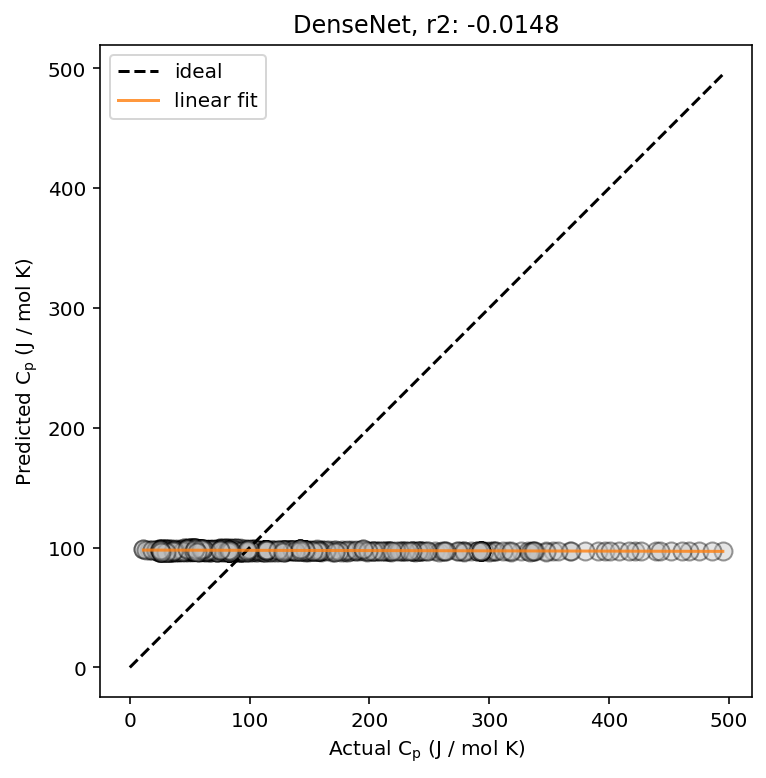

epoch: 20
epoch: 40
train r2: 0.9804
train mae: 4.3397
train rmse: 8.4812
val r2: 0.8935
val mae: 14.9098
val rmse: 26.2055


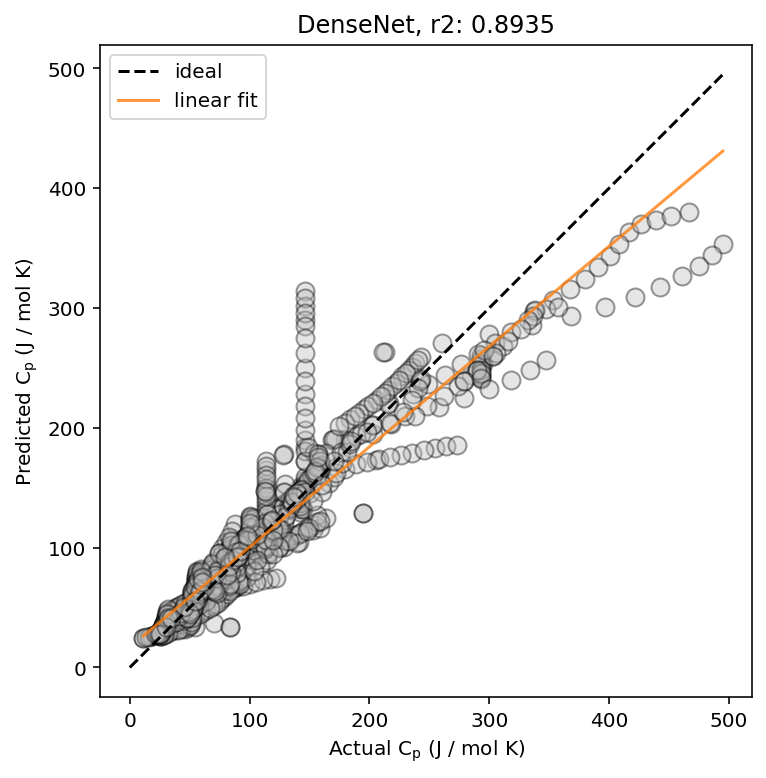

epoch: 60
epoch: 80
epoch: 100
train r2: 0.9832
train mae: 4.0050
train rmse: 7.8553
val r2: 0.8979
val mae: 15.3187
val rmse: 25.6635


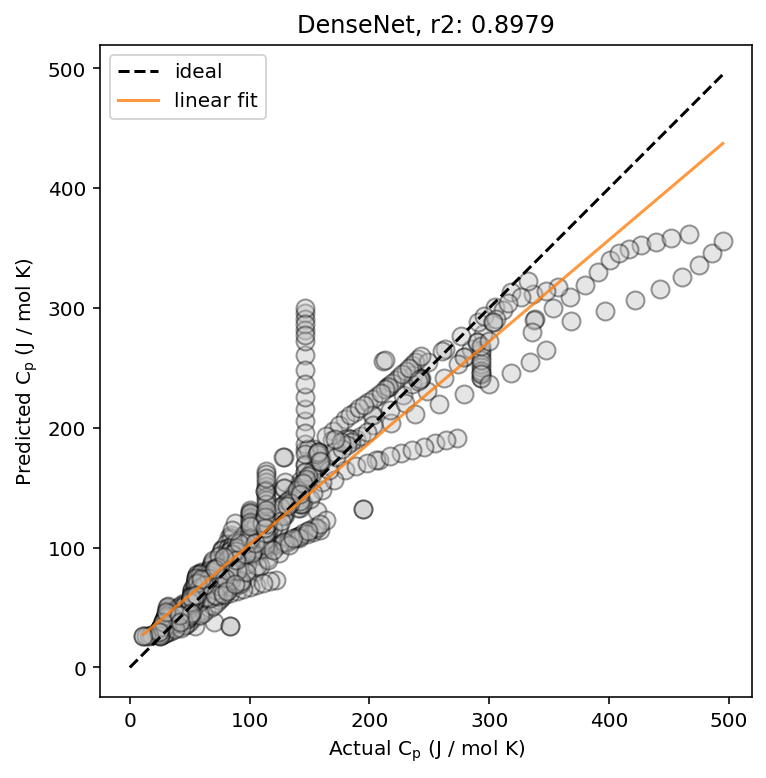

epoch: 120
epoch: 140
train r2: 0.9848
train mae: 3.7731
train rmse: 7.4724
val r2: 0.9077
val mae: 15.0600
val rmse: 24.4019


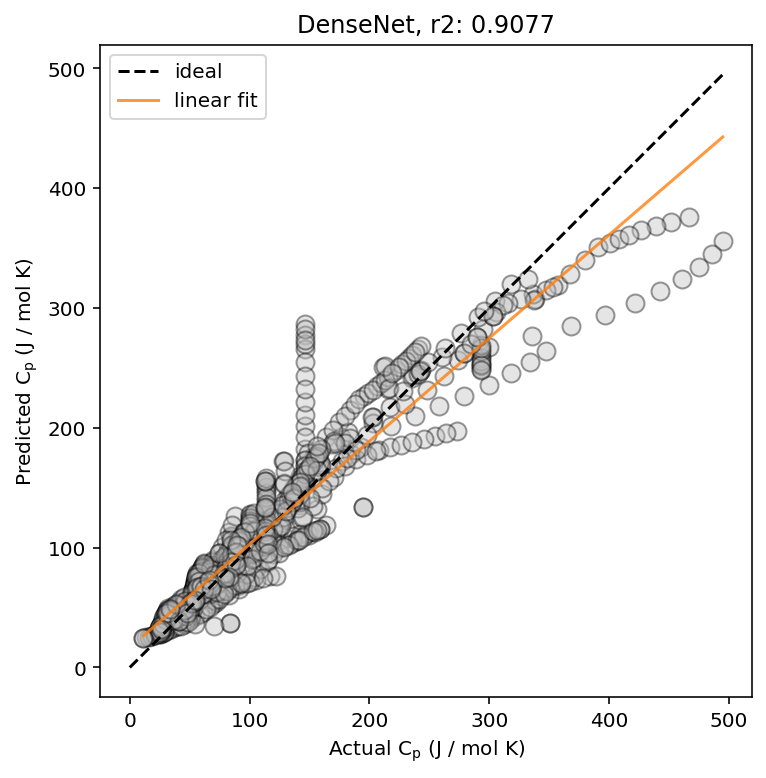

epoch: 160
epoch: 180
epoch: 200
train r2: 0.9851
train mae: 3.5731
train rmse: 7.3965
val r2: 0.9081
val mae: 14.2706
val rmse: 24.3469


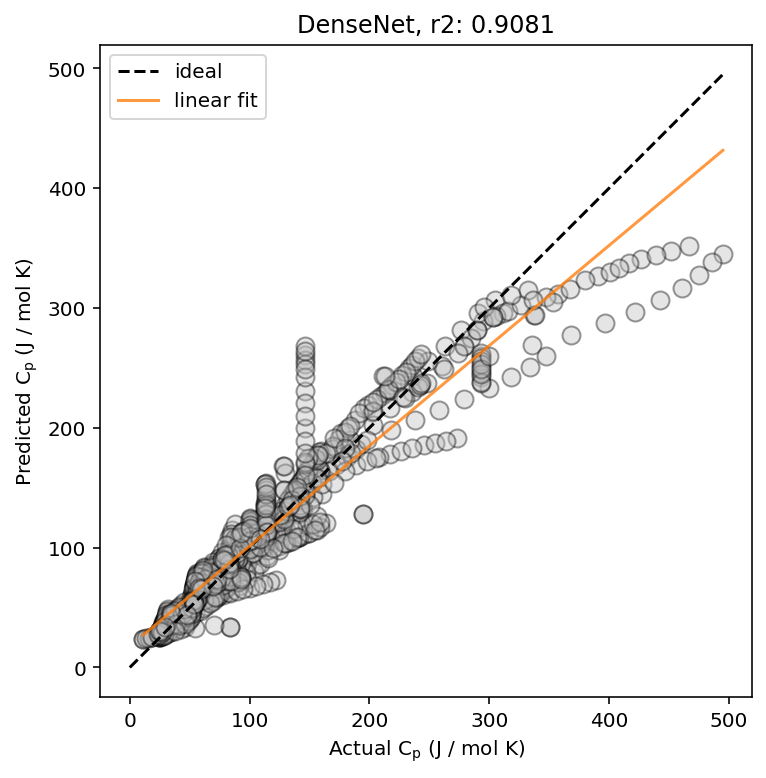

epoch: 220
epoch: 240
train r2: 0.9871
train mae: 3.1629
train rmse: 6.8861
val r2: 0.9042
val mae: 15.4619
val rmse: 24.8615


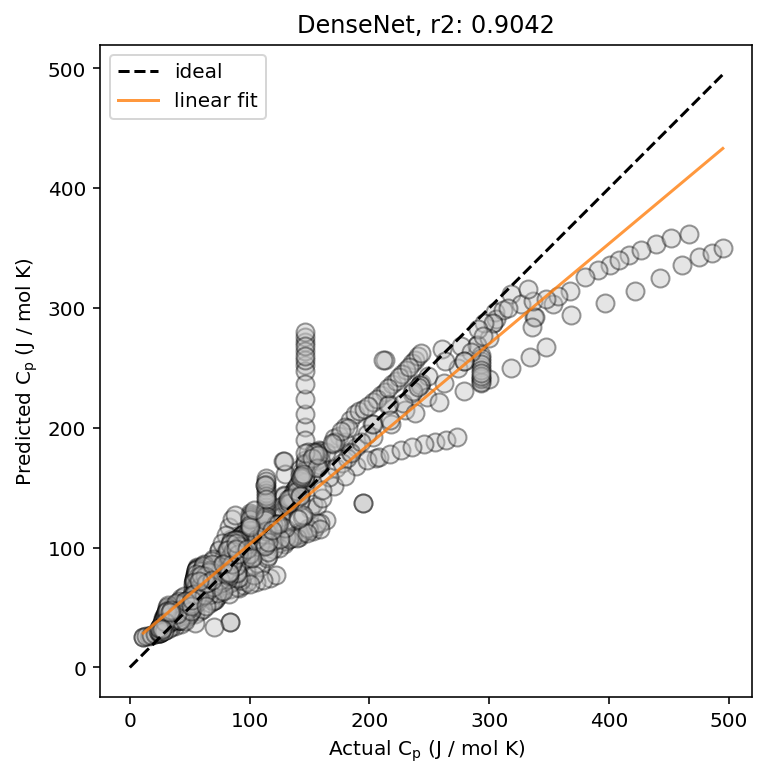

epoch: 260
epoch: 280
epoch: 300
train r2: 0.9876
train mae: 2.9597
train rmse: 6.7658
val r2: 0.9083
val mae: 14.5981
val rmse: 24.3247


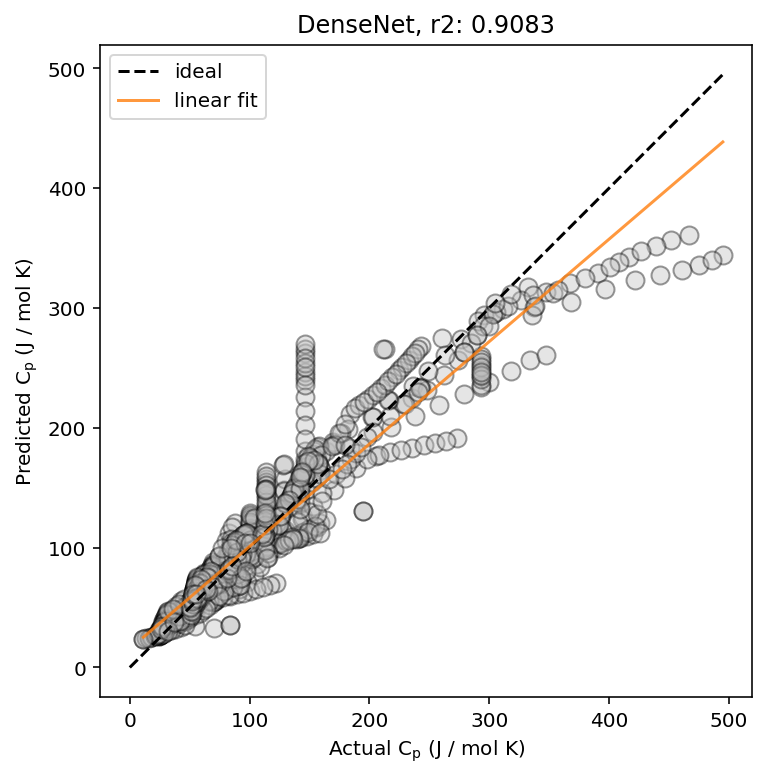

epoch: 320
epoch: 340
train r2: 0.9876
train mae: 3.1760
train rmse: 6.7499
val r2: 0.9040
val mae: 15.1315
val rmse: 24.8869


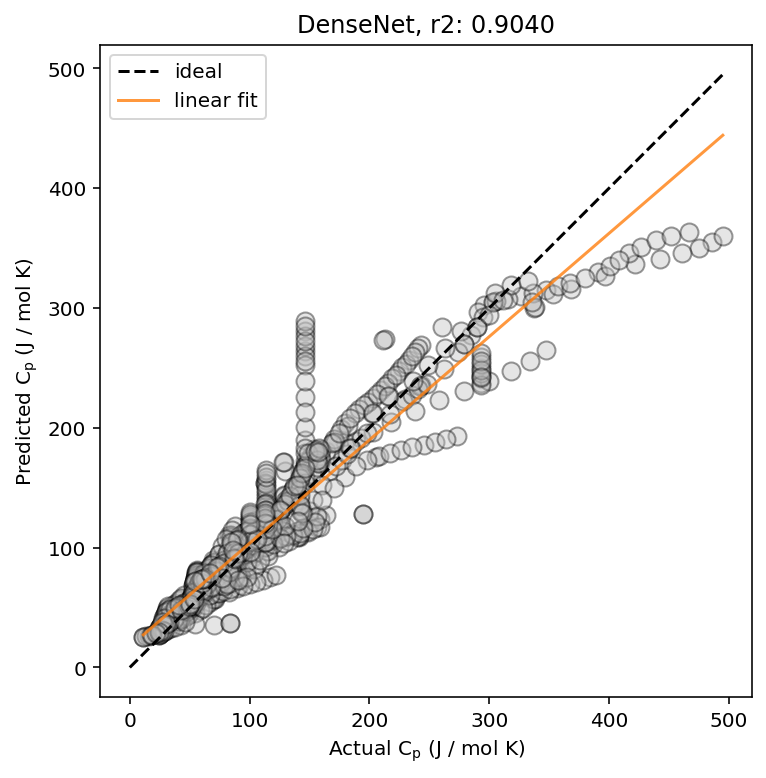

epoch: 360
epoch: 380
epoch: 400
train r2: 0.9871
train mae: 3.3301
train rmse: 6.8897
val r2: 0.9040
val mae: 14.6508
val rmse: 24.8805


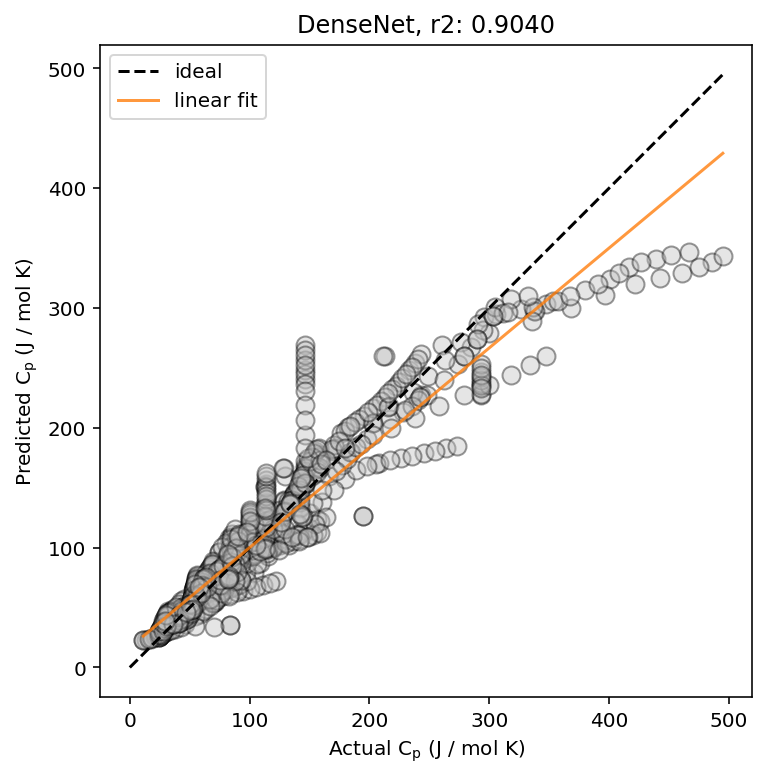

epoch: 420
epoch: 440
train r2: 0.9837
train mae: 4.1222
train rmse: 7.7437
val r2: 0.8938
val mae: 15.4383
val rmse: 26.1741


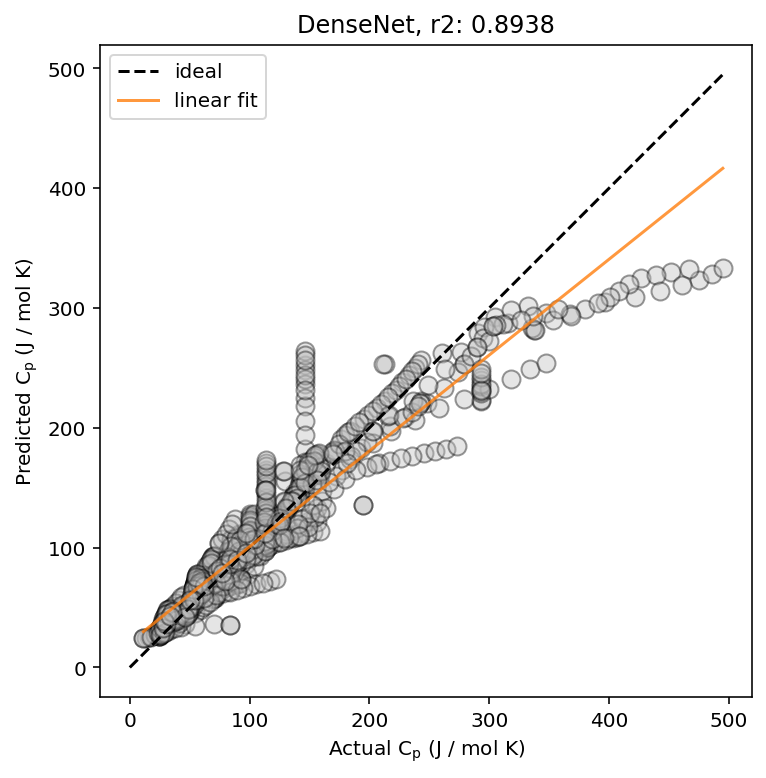

epoch: 460
epoch: 480
epoch: 499


In [82]:
data_type = torch.float
epochs = 500

print_every = 20
plot_every = 50

for epoch in range(epochs):
    if epoch % print_every == 0 or epoch == epochs - 1:
        print(f'epoch: {epoch}')
    if epoch % plot_every == 0:        
        target_train, pred_train = predict(model, train_loader)
        train_scores = evaluate(target_train, pred_train)
        print_scores(train_scores, label='train')
        
        target_val, pred_val = predict(model, val_loader)
        val_scores = evaluate(target_val, pred_val)
        print_scores(val_scores, label='val')
        plot_pred_act(target_val, pred_val, model, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')
        plt.show()
        
    for i, data_output in enumerate(train_loader):
        X, y = data_output
        y = target_scaler.scale(y)
        
        X = X.to(compute_device,
                 dtype=data_type,
                 non_blocking=True)
        y = y.to(compute_device,
                 dtype=data_type,
                 non_blocking=True)
        
        optimizer.zero_grad()
        output = model.forward(X).flatten()
        loss = criterion(output.view(-1), y.view(-1))
        loss.backward()
        optimizer.step()

Now, with our trained neural network, we can evaluate the performance of the model (at the end of the training phase) on the validation dataset.

val r2: 0.9091
val mae: 14.7900
val rmse: 24.2114


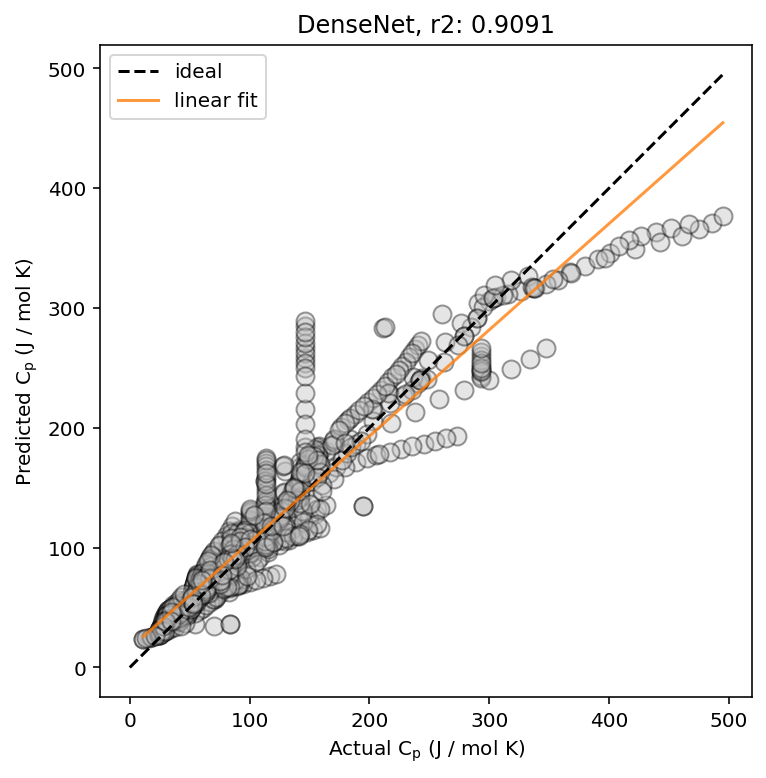

In [83]:
target_val, pred_val = predict(model, val_loader)
scores = evaluate(target_val, pred_val)

print_scores(scores, label='val')

plot = plot_pred_act(target_val, pred_val, model, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

## Keeping track of training progress -- avoid overfitting

Note, you can keep track of the training progress by saving the train and validation metrics such as $r^2$ and MAE at every epoch.
Then, you can plot so-called "loss curves" that show the loss of the model vs. epoch throughout the training process.
This gives you additional insight into your model training process, and helps you diagnose issues such as overfitting, improper model/optimizer/loss parameters, and so on.

Once you start tracking these performance metrics during your training loop, you can also implement more advanced training techniques such as "early stopping".
In early stopping, you observe the performance metrics (such as validation $r^2$ or MAE) over the training epochs, and you stop the training process if you observe that the metrics are not improving any more (meaning your model is fully trained), or if the metrics are increasing again after reaching a minimum (meaning your model is overfitting the training set).

## Evaluating model performance on test dataset

And finally evaluate the performance on the test dataset.
**Remember:** you should only do this *once!*

test r2: 0.8911
test mae: 15.8129
test rmse: 25.7186


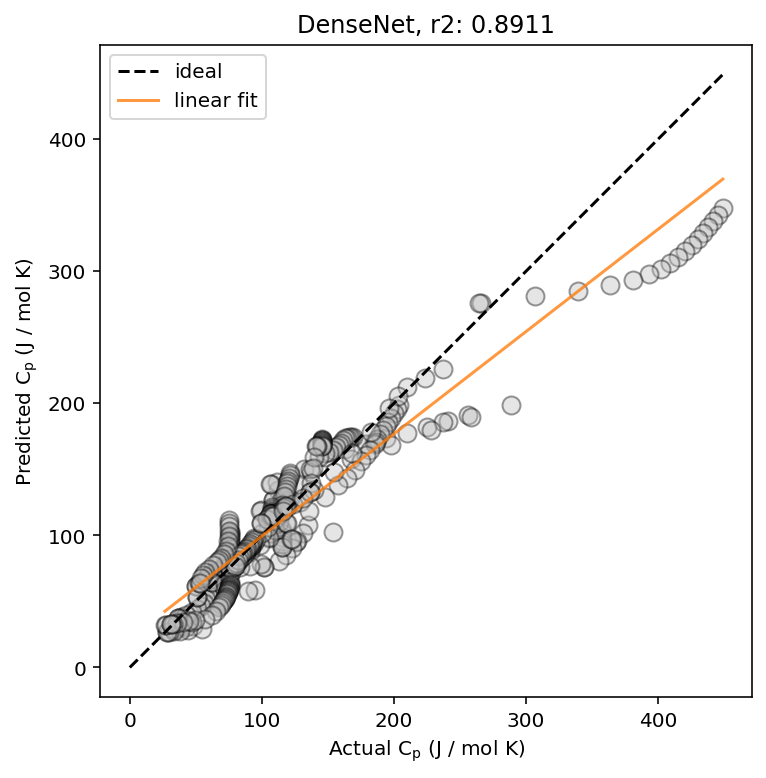

In [84]:
target_test, pred_test = predict(model, test_loader)
scores = evaluate(target_test, pred_test)

print_scores(scores, label='test')

plot = plot_pred_act(target_test, pred_test, model, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

# Exporting PyTorch models

Now that we've got a (reasonably well-performing) model, we can export the weights and biases from the model to what is referred to as a "checkpoint" file.

The advantages of exporting your model to a checkpoint file are manifold.
For example, when you want to re-use the model again later (to make further predictions, or even to continue training), you don't have to train the model from scratch again.
For our current `DenseNet` model, this may not seem like a big deal, since it trains within minutes.
But once you start moving on to larger and larger models, model training time can reach hours, days---even weeks!

Another advantage is that you can greatly enhance the reproducibility of your work.
If you export your models, other researchers can then recreate your model architecture on their system, then load your weights into the model to get exactly the model you trained.
This allows them to use your model as-is, and enables them to reproduce your work---an important step if they are to judge the merit of your work.

With that said, we will now use PyTorch's built-in methods to export (1) our `DenseNet` model, and (2) our `target_scaler` (we need to export our `target_scaler` object as well, because we need to use it to unscale the model predictions to get back the true prediction values.

## Saving the model + target scaler

In [85]:
save_dict = {'weights': model.state_dict(),
             'scaler_state': target_scaler.state_dict()}
print(save_dict)

{'weights': OrderedDict([('network.0.0.weight', tensor([[ 4.6154e-03,  6.0346e-03,  2.0878e-01,  ...,  8.4229e-01,
          5.8214e-01, -6.6681e+00],
        [-5.7527e-02, -6.0875e-02, -4.0824e-02,  ...,  1.0072e+00,
          7.3468e-01, -1.1172e+01],
        [ 3.6055e-01,  2.7392e-01,  6.5438e-01,  ...,  1.1392e-01,
         -2.1415e-01,  3.6256e+00],
        ...,
        [-7.0296e-01, -7.4445e-01, -3.8083e-01,  ...,  8.0211e-01,
         -1.9236e-01, -1.1914e+01],
        [-8.1058e-01, -8.0783e-01, -8.0749e-01,  ..., -3.4006e-01,
         -3.4208e-01, -3.5819e+00],
        [ 1.6095e-01,  1.8365e-01,  4.8591e-01,  ..., -8.5051e-02,
         -3.3809e-01, -5.8137e+00]])), ('network.0.0.bias', tensor([-0.2235, -0.4050, -0.9396, -0.1131, -0.3238,  0.1845, -0.1317, -0.4556,
        -0.2171,  0.1931, -0.2328,  0.1520,  0.1561, -0.3151, -0.5161,  0.3511])), ('network.1.weight', tensor([[ 0.1267, -0.3199,  0.1645,  0.0804,  0.2246, -0.1778, -0.1391,  0.1369,
         -0.1925, -0.1209, -0.09

In [86]:
pth_path = ('model_checkpoint.pth') # .pth is commonly used as the file extension
torch.save(save_dict, pth_path)

Navigate to your notebooks directory. You should now find a file named 'model_checkpoint.pth'.
Since the `DenseNet` model is small, the checkpoint file weighs in relatively lightly at 13KB.
Bigger models will have more weights & biases, and will require more storage space for the checkpoint file.

## Loading the model + target scaler

Of course, if you provide the facilities to **save** a model, you should also provide facilities to **load** them and to recreate your model back.

Thankfully, PyTorch makes this also easy.

In [87]:
# First, clear the variables for model and target_scaler.
# We want to start with a clean slate.
model = None
target_scaler = None
del model
del target_scaler

We start by recreating the `DenseNet` model and the `target_scaler` that we originally built. This model will be initialized with random weights & biases, which we will then overload (overwrite) afterwards with the values from the checkpoint file.

Make sure that you create the same model and `target_scaler` here as the ones you saved the checkpoint file from. Otherwise you will not be able to load the checkpoint file, or it will produce unexpected results.

In [88]:
# Instantiate the model.
# The model will be randomly initialized, but we will overwrite
# all weights and biases when we load the checkpoint.
model = DenseNet(input_dims, hidden_dims=[16], dropout=0.0)
model = model.to(compute_device)
print(model)

# Instantiate the target_scaler.
# We initialize this target_scaler with a vector of zeros,
# but we will overwrite its internal parameters
# when we load the checkpoint.
target_scaler = MeanLogNormScaler(torch.zeros(42))

DenseNet(
  (network): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=309, out_features=16, bias=True)
      (1): Dropout(p=0.0, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [89]:
# Load the checkpoint and map it to the compute device
pth_path = ('model_checkpoint.pth')
checkpoint = torch.load(pth_path, map_location=compute_device)

# Load the state dictionaries back into the model and target_scaler
model.load_state_dict(checkpoint['weights'])
target_scaler.load_state_dict(checkpoint['scaler_state'])

## Checking the loaded model

test r2: 0.8911
test mae: 15.8129
test rmse: 25.7186


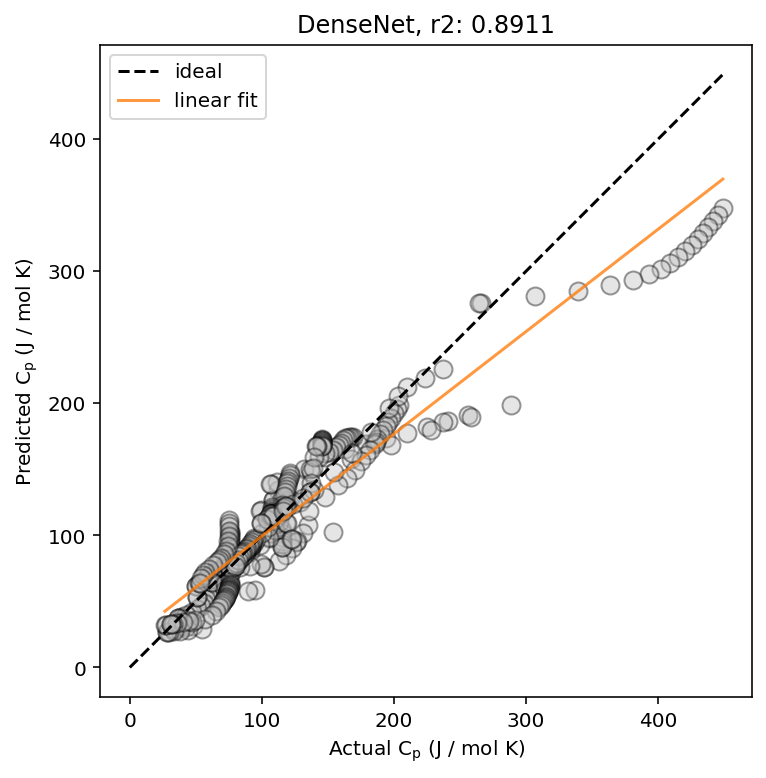

In [90]:
target_test, pred_test = predict(model, test_loader)
scores = evaluate(target_test, pred_test)

print_scores(scores, label='test')

plot = plot_pred_act(target_test, pred_test, model, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')